# 模板匹配

这里我们最终要实现的效果如下所示

![res_mario](./images/res_mario.jpg)

- refer: https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

## 获得图片

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 读取图片
image = cv2.imread('images/res_mario.jpg')
# 获取图片的宽度和高度
height, width = image.shape[:2]
print(f'width: {width}, height: {height}')

width: 450, height: 240


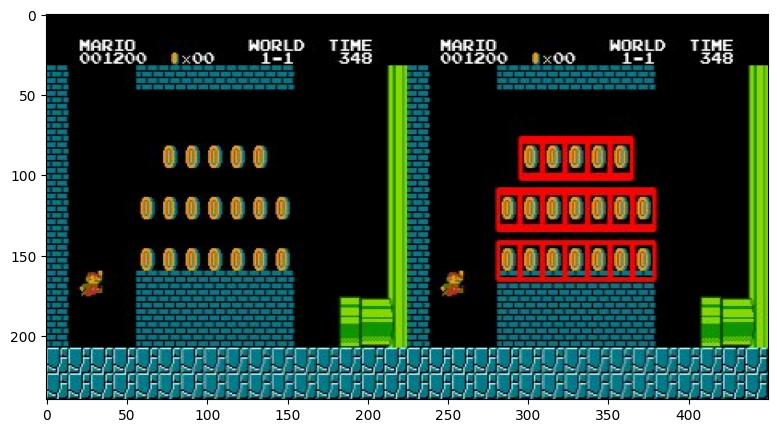

In [4]:
image_BGR = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# 显示原图
plt.figure("Original Image", figsize=(20, 5))
plt.imshow(image_BGR)
plt.show()

In [5]:
cut_point = width // 2
# 切割成两张图片
left_image = image[:, :cut_point, :]
right_image = image[:, cut_point:, :]

# 保存切割后的图片
cv2.imwrite('images/mario.png', left_image)
cv2.imwrite('images/refer.png', right_image)

True

## 获得模板

> 这里我们有一个技巧就是可以通过drawio先简单框出，然后就可以直接知道xywh的信息了

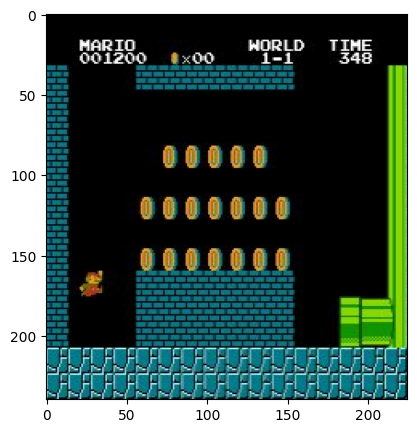

In [7]:
mario = cv2.imread('images/mario.png')

# 显示原图
mario_BGR = cv2.cvtColor(mario, cv2.COLOR_RGB2BGR)
plt.figure("Mario", figsize=(5, 5))
plt.imshow(mario_BGR)
plt.show()

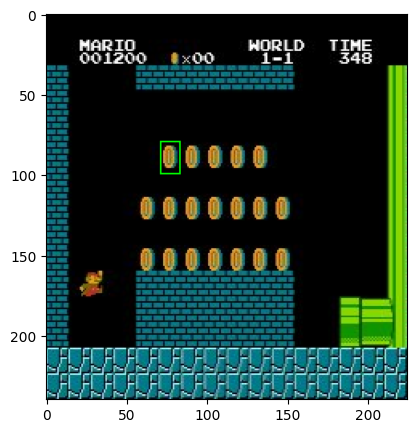

In [19]:
tmp_mario = mario.copy()
# 选择一个区域作为模板
bbox = [71, 79, 12, 20] # [左上角x, 左上角y, 宽度w, 高度h]
x, y, w, h = bbox
tmp_mario = cv2.rectangle(tmp_mario, [x, y], [x+w, y+h], (0, 255, 0), 1)

# 显示框出模板的图片
tmp_mario_BGR = cv2.cvtColor(tmp_mario, cv2.COLOR_RGB2BGR)
plt.figure("Mario", figsize=(5, 5))
plt.imshow(tmp_mario_BGR)
plt.show()

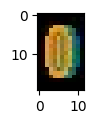

In [25]:
# 将框出的区域作为模板
template = mario[y:y+h, x:x+w, :]
# 显示模板
template_BGR = cv2.cvtColor(template, cv2.COLOR_RGB2BGR)
plt.figure("Template", figsize=(1, 1))
plt.imshow(template_BGR)
plt.show()

In [26]:
cv2.imwrite('images/template.png', template)

True

## 调用opencv的完成模板匹配

- 这里我们使用余弦相似度
- TM_CCORR_NORMED

$$
\mathbf{R}(x,y)=\frac{\sum_{x',y'}(\mathbf{T}(\mathbf{x'},\mathbf{y'})\cdot\mathbf{I}(\mathbf{x}+\mathbf{x'},\mathbf{y}+\mathbf{y'}))}{\sqrt{\sum_{x',y'}\mathbf{T}(\mathbf{x'},\mathbf{y'})^2\cdot\sum_{x',y'}\mathbf{I}(\mathbf{x}+\mathbf{x'},\mathbf{y}+\mathbf{y'})^2}}
$$

- refer: https://www.opencv.org.cn/opencvdoc/2.3.2/html/modules/imgproc/doc/object_detection.html?highlight=template#cv2.matchTemplate

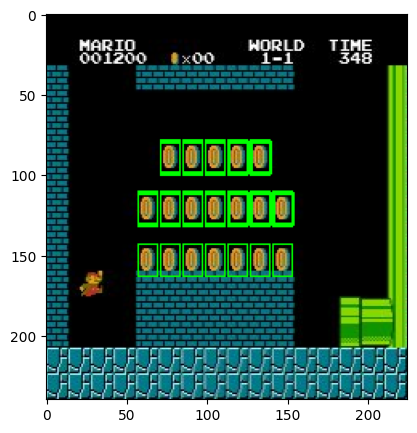

In [62]:
img_rgb = cv2.imread('images/mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/template.png', cv2.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCORR_NORMED)
threshold = 0.9
loc = np.where( res > threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,0), 1)

# 显示匹配结果
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
plt.figure("Predict", figsize=(5, 5))
plt.imshow(img_bgr)
plt.show()